In [1]:
import pandas as pd


file_path = 'midterm-regresi-dataset.csv'
df = pd.read_csv(file_path)

df.head()

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


In [2]:
print("df.shape:", df.shape) 

df.shape: (515344, 91)


In [3]:
import os
file_size_bytes = os.path.getsize(file_path)
file_size_mb = file_size_bytes / (1024 ** 2)

print(f"Ukuran file: {file_size_bytes:,} bytes")
print(f"Ukuran file: {file_size_mb:.2f} MB") 

Ukuran file: 443,423,087 bytes
Ukuran file: 422.88 MB


In [4]:
new_column_names = ['year'] + [f'feature_{i}' for i in range(df.shape[1] - 1)]
df.columns = new_column_names

print("DataFrame after renaming columns:")
print(df.head())
print("\nDataFrame Shape:", df.shape)
print("\nDescriptive Statistics:")
print(df.describe())

DataFrame after renaming columns:
   year  feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  2001   48.73215   18.42930   70.32679   12.94636  -10.32437  -24.83777   
1  2001   50.95714   31.85602   55.81851   13.41693   -6.57898  -18.54940   
2  2001   48.24750   -1.89837   36.29772    2.58776    0.97170  -26.21683   
3  2001   50.97020   42.20998   67.09964    8.46791  -15.85279  -16.81409   
4  2001   50.54767    0.31568   92.35066   22.38696  -25.51870  -19.04928   

   feature_6  feature_7  feature_8  ...  feature_80  feature_81  feature_82  \
0    8.76630   -0.92019   18.76548  ...     5.66812   -19.68073    33.04964   
1   -3.27872   -2.35035   16.07017  ...     3.03800    26.05866   -50.92779   
2    5.05097  -10.34124    3.55005  ...    34.57337  -171.70734   -16.96705   
3  -12.48207   -9.37636   12.63699  ...     9.92661   -55.95724    64.92712   
4   20.67345   -5.19943    3.63566  ...     6.59753   -50.69577    26.02574   

   feature_83  feature_84  f


--- Missing Values Analysis ---
No missing values found in the DataFrame.


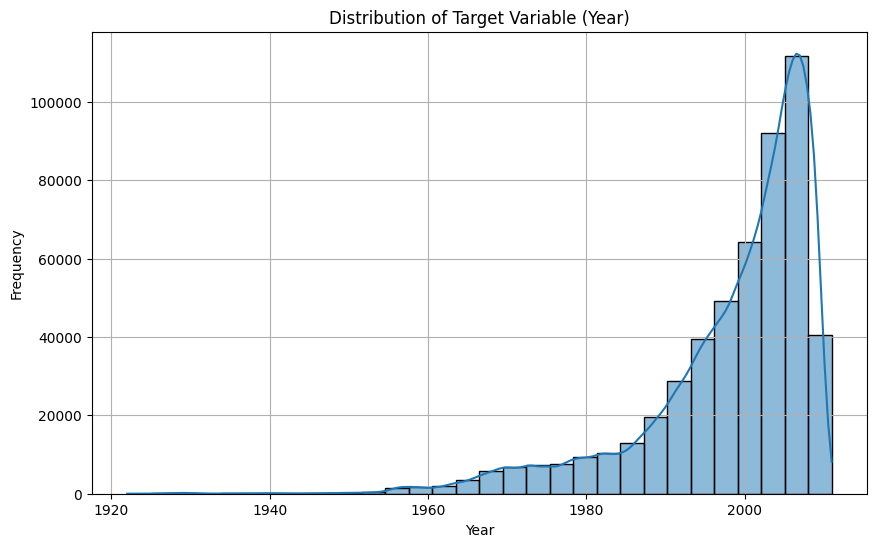

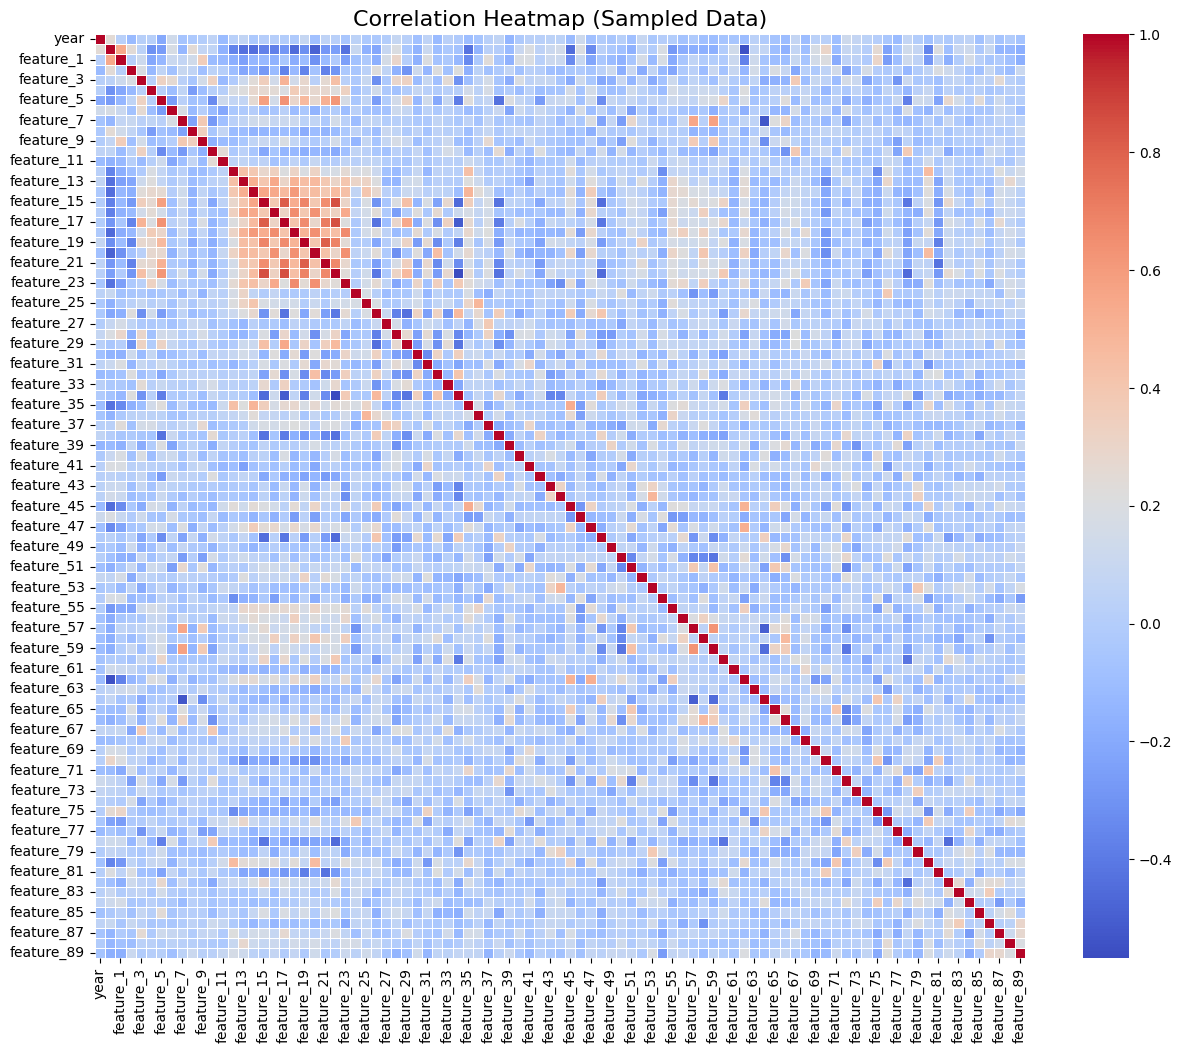


--- Top 10 Features Most Correlated with 'year' (Absolute Value) ---
feature_0     0.248863
feature_5     0.204552
feature_39    0.143097
feature_6     0.137473
feature_72    0.129452
feature_46    0.125458
feature_32    0.118514
feature_2     0.117124
feature_45    0.114739
feature_77    0.111710
Name: year, dtype: float64


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Missing Count': missing_values, 'Missing Percentage': missing_percentage})
missing_info = missing_info[missing_info['Missing Count'] > 0].round(2)

print("\n--- Missing Values Analysis ---")
if not missing_info.empty:
    print(missing_info)
else:
    print("No missing values found in the DataFrame.")


plt.figure(figsize=(10, 6))
sns.histplot(df['year'], bins=30, kde=True)
plt.title('Distribution of Target Variable (Year)')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

sample_size = 2000
if len(df) > sample_size:
    df_sampled = df.sample(n=sample_size, random_state=42)
else:
    df_sampled = df.copy()

correlation_matrix = df_sampled.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap (Sampled Data)', fontsize=16)
plt.show()

correlation_with_year = correlation_matrix['year'].abs().sort_values(ascending=False)

top_10_correlated_features = correlation_with_year[correlation_with_year.index != 'year'].head(10)

print("\n--- Top 10 Features Most Correlated with 'year' (Absolute Value) ---")
print(top_10_correlated_features)

In [6]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader

X = df.drop('year', axis=1)
y = df['year']

imputer = SimpleImputer(strategy='median')

X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1).to(device)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1).to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 1024
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"\nX_train_tensor shape: {X_train_tensor.shape}")
print(f"y_train_tensor shape: {y_train_tensor.shape}")
print(f"X_test_tensor shape: {X_test_tensor.shape}")
print(f"y_test_tensor shape: {y_test_tensor.shape}")

print(f"\nNumber of batches in training DataLoader: {len(train_loader)}")
print(f"Number of batches in testing DataLoader: {len(test_loader)}")

Using device: cuda

X_train_tensor shape: torch.Size([412275, 90])
y_train_tensor shape: torch.Size([412275, 1])
X_test_tensor shape: torch.Size([103069, 90])
y_test_tensor shape: torch.Size([103069, 1])

Number of batches in training DataLoader: 403
Number of batches in testing DataLoader: 101


In [7]:
import torch.nn as nn
import torch.nn.init as init


class FNNRegressor(nn.Module):
    def __init__(self, input_size, dropout_rate=0.15):
        super(FNNRegressor, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)

        self.fc2 = nn.Linear(256, 256)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)

        self.fc3 = nn.Linear(256, 128)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(dropout_rate)

        self.fc4 = nn.Linear(128, 64)
        self.relu4 = nn.ReLU()
        self.dropout4 = nn.Dropout(dropout_rate)

        self.fc_out = nn.Linear(64, 1)

        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
               
                init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')
              
                if m.bias is not None:
                    init.zeros_(m.bias)

    def forward(self, x):
        x = self.dropout1(self.relu1(self.fc1(x)))
        x = self.dropout2(self.relu2(self.fc2(x)))
        x = self.dropout3(self.relu3(self.fc3(x)))
        x = self.dropout4(self.relu4(self.fc4(x)))
        x = self.fc_out(x)
        return x

input_dim = X_train_tensor.shape[1]

model = FNNRegressor(input_dim).to(device)

print(model)
print(f"Model is on: {next(model.parameters()).device}")

FNNRegressor(
  (fc1): Linear(in_features=90, out_features=256, bias=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.15, inplace=False)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.15, inplace=False)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (relu3): ReLU()
  (dropout3): Dropout(p=0.15, inplace=False)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (relu4): ReLU()
  (dropout4): Dropout(p=0.15, inplace=False)
  (fc_out): Linear(in_features=64, out_features=1, bias=True)
)
Model is on: cuda:0


In [8]:
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau


criterion = nn.MSELoss()
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10)

num_epochs = 20

print(f"Loss Function: {criterion}")
print(f"Optimizer: {optimizer}")
print(f"Learning Rate Scheduler: {scheduler}")
print(f"Number of Epochs: {num_epochs}")

Loss Function: MSELoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
Learning Rate Scheduler: <torch.optim.lr_scheduler.ReduceLROnPlateau object at 0x000002346177ECF0>
Number of Epochs: 20


In [9]:
import time

train_losses = []
val_losses = []
learning_rates = []

print("Starting model training...")

for epoch in range(num_epochs):
    start_time = time.time()
    model.train() 
    current_train_loss = 0.0

    for batch_idx, (data, target) in enumerate(train_loader):
       
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()

        current_train_loss += loss.item()

    avg_train_loss = current_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    
    model.eval()
    current_val_loss = 0.0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)

            outputs = model(data)

            loss = criterion(outputs, target)
            current_val_loss += loss.item()

    avg_val_loss = current_val_loss / len(test_loader)
    val_losses.append(avg_val_loss)
    scheduler.step(avg_val_loss)
    current_lr = optimizer.param_groups[0]['lr']
    learning_rates.append(current_lr)
    end_time = time.time()
    epoch_duration = end_time - start_time

    print(f"Epoch {epoch+1}/{num_epochs} | "
          f"Train Loss: {avg_train_loss:.4f} | "
          f"Validation Loss: {avg_val_loss:.4f} | "
          f"Learning Rate: {current_lr:.6f} | "
          f"Duration: {epoch_duration:.2f}s")

print("Model training complete.")

Starting model training...
Epoch 1/20 | Train Loss: 564521.8005 | Validation Loss: 112383.1127 | Learning Rate: 0.001000 | Duration: 6.49s
Epoch 2/20 | Train Loss: 109071.8940 | Validation Loss: 26386.6930 | Learning Rate: 0.001000 | Duration: 6.42s
Epoch 3/20 | Train Loss: 57823.1184 | Validation Loss: 6943.4633 | Learning Rate: 0.001000 | Duration: 5.55s
Epoch 4/20 | Train Loss: 44896.7294 | Validation Loss: 3023.2148 | Learning Rate: 0.001000 | Duration: 5.58s
Epoch 5/20 | Train Loss: 39898.4194 | Validation Loss: 1638.2735 | Learning Rate: 0.001000 | Duration: 5.29s
Epoch 6/20 | Train Loss: 36846.1733 | Validation Loss: 1039.5405 | Learning Rate: 0.001000 | Duration: 5.10s
Epoch 7/20 | Train Loss: 34924.4087 | Validation Loss: 2353.3846 | Learning Rate: 0.001000 | Duration: 5.43s
Epoch 8/20 | Train Loss: 33458.5768 | Validation Loss: 6470.6443 | Learning Rate: 0.001000 | Duration: 5.15s
Epoch 9/20 | Train Loss: 32608.0772 | Validation Loss: 1243.1161 | Learning Rate: 0.001000 | Dur

In [10]:
import torch
import torch.nn as nn
import torch.nn.init as init
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

X = df.drop('year', axis=1)
y = df['year']

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1).to(device)

class FNNRegressor(nn.Module):
    def __init__(self, input_size, dropout_rate=0.15):
        super(FNNRegressor, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)

        self.fc2 = nn.Linear(256, 256)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)

        self.fc3 = nn.Linear(256, 128)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(dropout_rate)

        self.fc4 = nn.Linear(128, 64)
        self.relu4 = nn.ReLU()
        self.dropout4 = nn.Dropout(dropout_rate)

        self.fc_out = nn.Linear(64, 1)

        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')
                if m.bias is not None:
                    init.zeros_(m.bias)

    def forward(self, x):
        x = self.dropout1(self.relu1(self.fc1(x)))
        x = self.dropout2(self.relu2(self.fc2(x)))
        x = self.dropout3(self.relu3(self.fc3(x)))
        x = self.dropout4(self.relu4(self.fc4(x)))
        x = self.fc_out(x)
        return x

input_dim = X_train_tensor.shape[1]
model = FNNRegressor(input_dim).to(device)

criterion = nn.MSELoss()


model.eval()

with torch.no_grad():
    y_train_pred_tensor = model(X_train_tensor)
    y_train_actual = y_train_tensor.cpu().numpy()
    y_train_pred = y_train_pred_tensor.cpu().numpy()
    train_mse = mean_squared_error(y_train_actual, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train_actual, y_train_pred)
    train_r2 = r2_score(y_train_actual, y_train_pred)
    y_test_pred_tensor = model(X_test_tensor)

    y_test_actual = y_test_tensor.cpu().numpy()
    y_test_pred = y_test_pred_tensor.cpu().numpy()

    test_mse = mean_squared_error(y_test_actual, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test_actual, y_test_pred)
    test_r2 = r2_score(y_test_actual, y_test_pred)

print("\n--- Training Set Metrics ---")
print(f"MSE: {train_mse:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAE: {train_mae:.4f}")
print(f"R-squared: {train_r2:.4f}")

print("\n--- Test Set Metrics ---")
print(f"MSE: {test_mse:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAE: {test_mae:.4f}")
print(f"R-squared: {test_r2:.4f}")


--- Training Set Metrics ---
MSE: 3988946.0000
RMSE: 1997.2346
MAE: 1997.2046
R-squared: -33327.1484

--- Test Set Metrics ---
MSE: 3989184.2500
RMSE: 1997.2942
MAE: 1997.2646
R-squared: -33609.8438


In [11]:
model.eval() # Set the model to evaluation mode

with torch.no_grad(): # Disable gradient calculation
    # Make predictions on the entire X_test_tensor
    y_pred_tensor = model(X_test_tensor)

    # Calculate the Mean Squared Error (MSE)
    test_mse = criterion(y_pred_tensor, y_test_tensor)

print(f"Mean Squared Error on Test Set: {test_mse.item():.4f}")

Mean Squared Error on Test Set: 3989184.7500
